In a new notebook, load the dataframe object.   

Using k-fold cross-validation, apply a linear regression model.   

Here, the response variable is the number of times a song has been played based on what we know about the listeners. 

Be sure to return the model score on both the training and validation data.

Explain your results. Specifically address, if the assumption of linear response to the input features was reasonable. 

You will want to study a plot of the model's residual. 
Ideally, the residuals are small in magnitude, and are evenly distributed about the true values. 
What are some possible improvements that can be made?

Suppose we are instead curious about whether a song will be played by a user based on a demographics. 
Apply a logistic regression model and report your results

# Modeling

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
#call the pickled object and save it to a variable
pickle_in = open("data.pkl", "rb")
data = pickle.load(pickle_in)


In [3]:
y= data.Plays

In [4]:
y.head()

Track
! (Foreword)                                       8
# 173 - The Stills, Novillero, Fred Eaglesmith     1
# 174 - The Organ, Sloan, Jill Barber              2
#1                                                65
#1 Crush                                           7
Name: Plays, dtype: int64

## K-fold Cross-Validation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [6]:
#X_train = data[train].drop(['Plays'],axis=1)
#y_train = data[train]["Plays"]
#X_test = data[test].drop(['Plays'],axis=1)
#y_test = data[test]["Plays"]

## Linear Modeling

In [7]:
lm = LinearRegression()

In [8]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Analysis of Linear Model

In [9]:
print ('Coeff and intercept:', lm.coef_, lm.intercept_ )

Coeff and intercept: [ 1.00000000e+00 -2.90213774e-17 -6.48969379e-17  1.23203149e-16
  6.31157239e-17] 2.9309887850104133e-13


In [10]:
print ('Training Score:', lm.score(X_train, y_train))
print ('Testing Score:', lm.score(X_test, y_test))
print ('Training MSE: ', np.mean((lm.predict(X_train) - y_train)**2))
print ('Testing MSE: ', np.mean((lm.predict(X_test) - y_test)**2))

Training Score: 1.0
Testing Score: 1.0
Training MSE:  1.1668577601683573e-24
Testing MSE:  1.1375898719555836e-24


Given that the scoring for this model is 1.o ( a perfect score) I suspect overfitting. The residuals should indicate the same.

### Residuals

C:\Users\rpena\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


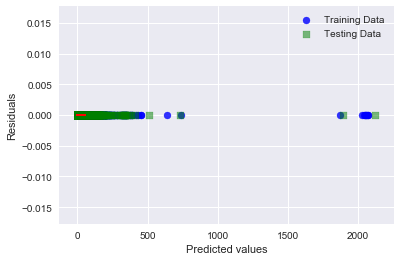

In [11]:
plt.scatter(y_train, (lm.predict(X_train)-y_train), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(y_test, (lm.predict(X_test)-y_test), c='green', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show();

Explain Residuals

The residuals of this model appear to be perfectl aligned. I believe that this model is severly overfit.

## Logistic Model

In [12]:
logM = LogisticRegression(random_state=2,solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

C:\Users\rpena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
logM.score(X_test, y_test)

0.7063032951964692

In [14]:
y_pred = logM.predict(X_test)
report=classification_report(y_test,y_pred)

C:\Users\rpena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rpena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [15]:
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      8933
           2       0.90      0.86      0.88      3639
           3       0.65      0.74      0.69      2062
           4       0.66      0.61      0.64      1407
           5       0.55      0.67      0.61       999
           6       0.53      0.46      0.49       757
           7       0.51      0.57      0.54       586
           8       0.27      0.37      0.31       464
           9       0.15      0.11      0.13       404
          10       0.21      0.14      0.17       351
          11       0.28      0.21      0.24       321
          12       0.17      0.26      0.21       238
          13       0.24      0.28      0.26       241
          14       0.18      0.11      0.14       236
          15       0.18      0.10      0.13       213
          16       0.12      0.37      0.18       191
          17       0.00      0.00      0.00       155
          18       0.00    